<h3>0. Importing Libraries</h3>

In [384]:
# data manipulation and visualization libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

sns.set()

<h3>1. Reading Dataset 👀</h3>

<h4>1.1 Dataset Dictionary 📃</h4>

<ul>
    <li><strong>country</strong>: Name of the country</li>
    <li><strong>child_mort</strong>: Death of children under 5 years of age per 1000 live births</li>
    <li><strong>exports</strong>: Exports of goods and services per capita. Given as %age of the GDP per capita</li>
    <li><strong>health</strong>: Total health spending per capita. Given as %age of GDP per capita</li>
    <li><strong>imports</strong>: Imports of goods and services per capita. Given as %age of the GDP per capita</li>
    <li><strong>Income</strong>: Net income per person</li>
    <li><strong>Inflation</strong>: The measurement of the annual growth rate of the Total GDP</li>
    <li><strong>life_expec</strong>: The average number of years a new born child would live if the current mortality patterns are to remain the same</li>
    <li><strong>total_fer</strong>: The number of children that would be born to each woman if the current age-fertility rates remain the same.</li>
    <li><strong>gdpp</strong>: The GDP per capita. Calculated as the Total GDP divided by the total population.</li>
</ul>

In [385]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [387]:
df.describe(percentiles=[0.01,0.99]).T

,count,mean,std,min,1%,50%,99%,max
child_mort,167.0,38.270060,40.328931,2.6000,2.8000,19.30,153.4000,208.00
exports,167.0,41.108976,27.412010,0.1090,3.9094,35.00,160.4800,200.00
health,167.0,6.815689,2.746837,1.8100,2.1218,6.32,13.4740,17.90
imports,167.0,46.890215,24.209589,0.0659,12.9880,43.30,146.0800,174.00
income,167.0,17144.688623,19278.067698,609.0000,742.2400,9960.00,84374.0000,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,-2.3488,5.39,41.4780,104.00
life_expec,167.0,70.555689,8.893172,32.1000,47.1600,73.10,82.3700,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.2432,2.41,6.5636,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,331.6200,4660.00,79088.0000,105000.00


In [388]:
print(f"Number of rows: {df.shape[0]} \nNumber of columns: {df.shape[1]}")
print(f"\nNumber of missing values: {df.isnull().sum().sum()}")
print(f"\nIn this dataset, there are {df['country'].nunique()} countries.")

Number of rows: 167 
Number of columns: 10

Number of missing values: 0

In this dataset, there are 167 countries.


<h3>2. Data Vizualization 📊</h3>

<h4>2.1 BoxPlot </h4>
Boxplot is a graphical tool that allows you to visualize the distribution and discrepant values of the data. 

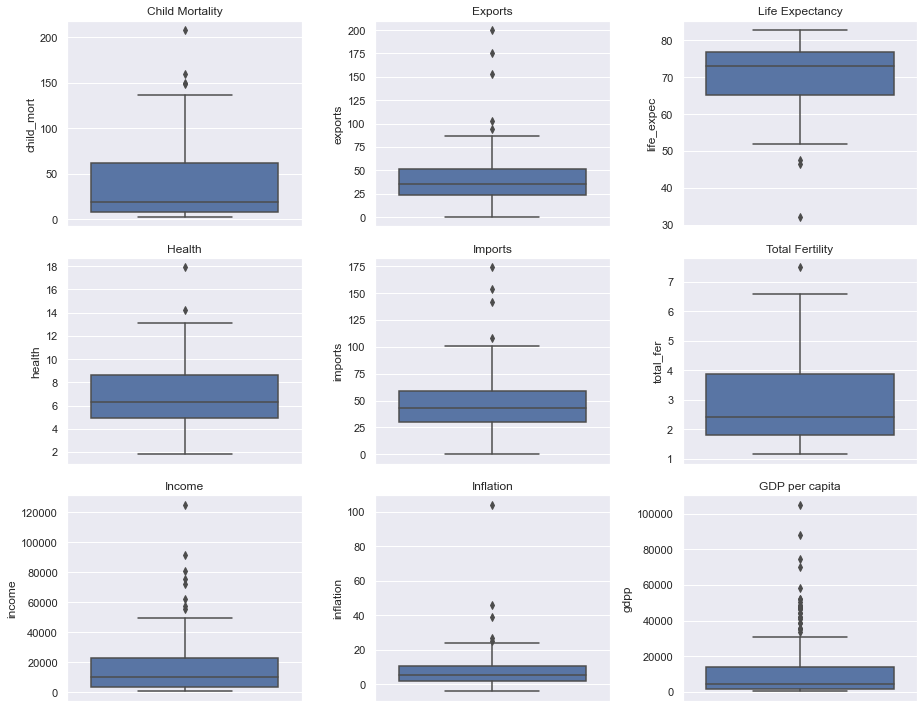

In [389]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (13, 10))

sns.boxplot(y='child_mort', data=df, ax=ax[0][0])
ax[0][0].set_title('Child Mortality')

sns.boxplot(y='exports', data=df, ax=ax[0][1])
ax[0][1].set_title('Exports')

sns.boxplot(y='health', data=df, ax=ax[1][0])
ax[1][0].set_title('Health')

sns.boxplot(y='imports', data=df, ax=ax[1][1])
ax[1][1].set_title('Imports')

sns.boxplot(y='income', data=df, ax=ax[2][0])
ax[2][0].set_title('Income')

sns.boxplot(y='inflation', data=df, ax=ax[2][1])
ax[2][1].set_title('Inflation')

sns.boxplot(y='life_expec', data=df, ax=ax[0][2])
ax[0][2].set_title('Life Expectancy')

sns.boxplot(y='total_fer', data=df, ax=ax[1][2])
ax[1][2].set_title('Total Fertility')

sns.boxplot(y='gdpp', data=df, ax=ax[2][2])
ax[2][2].set_title('GDP per capita')

plt.tight_layout()
plt.show()

Looking at the graph above, it is evident that our dataset contains several outliers in variables such as GDP, income, and inflation. These outliers have the potential to impact our model. However, due to the small size of the dataset (only 167 rows), it is generally better not to remove them, as doing so may result in a loss of valuable information.

<h3>2.2 Distribution with KDE</h3>
Distribution plot is suitable for comparing range and distribution for groups of numeric data


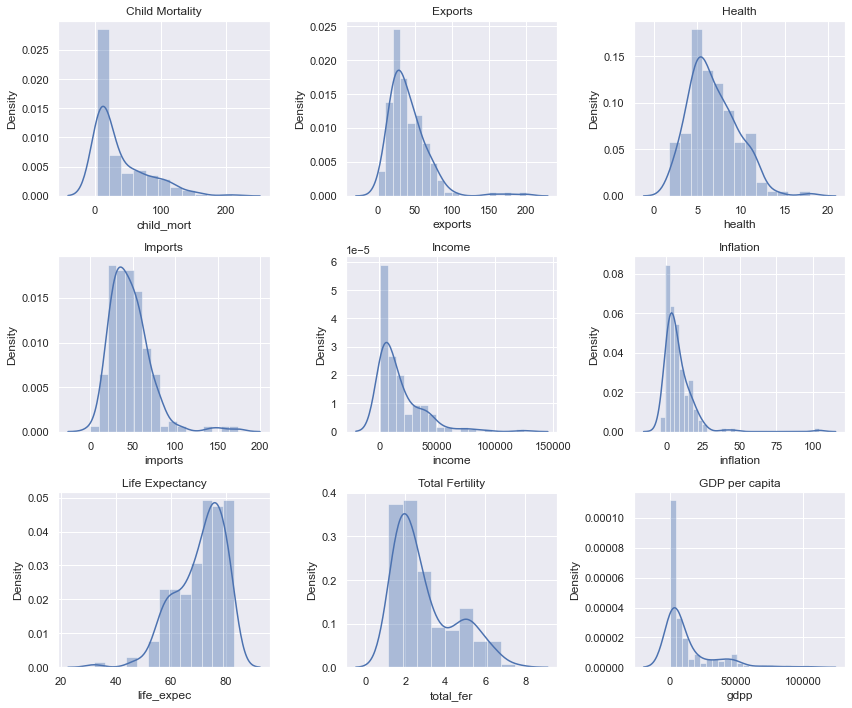

In [390]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

sns.distplot(df['child_mort'], kde=True, ax=ax[0][0])
ax[0][0].set_title('Child Mortality')

sns.distplot(df['exports'], kde=True, ax=ax[0][1])
ax[0][1].set_title('Exports')

sns.distplot(df['health'], kde=True, ax=ax[0][2])
ax[0][2].set_title('Health')

sns.distplot(df['imports'], kde=True, ax=ax[1][0])
ax[1][0].set_title('Imports')

sns.distplot(df['income'], kde=True, ax=ax[1][1])
ax[1][1].set_title('Income')

sns.distplot(df['inflation'], kde=True, ax=ax[1][2])
ax[1][2].set_title('Inflation')

sns.distplot(df['life_expec'], kde=True, ax=ax[2][0])
ax[2][0].set_title('Life Expectancy')

sns.distplot(df['total_fer'], kde=True, ax=ax[2][1])
ax[2][1].set_title('Total Fertility')

sns.distplot(df['gdpp'], kde=True, ax=ax[2][2])
ax[2][2].set_title('GDP per capita')

plt.tight_layout()
plt.show()

Based on the information provided by the graph, we can draw the following conclusions:
<ul>
    <li>The "Health" variable follows a normal distribution.</li>
    <li>The "life_expec" variable exhibits a negative asymmetric distribution.</li>
    <li>The remaining variables demonstrate a positive asymmetric distribution.</li>
</ul>

<h3>2.3 Correlation Matrix</h3>

<AxesSubplot: >

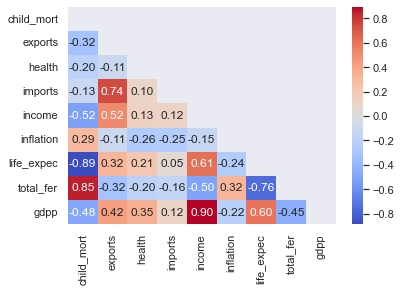

In [391]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm')

Upon examining the correlation matrix, we can draw the following conclusions:

<ol>
    <li>There is a strong positive correlation between total_fer and child_mort, income and gdpp, import and export.</li>
    <li>There is a negative correlation between life_expec and child_mort, life_expec and total_fer.</li>
</ol>

<h3>2.4 Choropleth Map 🗺</h3>

In [392]:
colors = ['plum', 'mediumorchid', 'darkviolet','indigo']

fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color='total_fer',
                    title='Countries by Child Mortality Rate',
                    color_continuous_scale=colors
                   )
fig.show()

In [393]:
colors = ['plum', 'mediumorchid', 'darkviolet','indigo']

fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color='health',
                    title='Countries by Total Health Spending',
                    color_continuous_scale=colors
                   )
fig.show()

In [394]:
colors = ['plum', 'mediumorchid', 'darkviolet','indigo']

fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color='imports',
                    title='Countries by Imports',
                    color_continuous_scale=colors
                   )
fig.show()

In [395]:
colors = ['plum', 'mediumorchid', 'darkviolet','indigo']

fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color='income',
                    title='Countries by Annual Income Per Person',
                    color_continuous_scale=colors
                   )
fig.show()

In [396]:
colors = ['plum', 'mediumorchid', 'darkviolet','indigo']

fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color='inflation',
                    title='Countries by Inflation',
                    color_continuous_scale=colors
                   )
fig.show()

In [397]:
colors = ['plum', 'mediumorchid', 'darkviolet','indigo']

fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color='life_expec',
                    title='Countries by Average Life Expectancy',
                    color_continuous_scale=colors
                   )
fig.show()

In [398]:
colors = ['plum', 'mediumorchid', 'darkviolet','indigo']

fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color='total_fer',
                    title='Countries by Total Fertility',
                    color_continuous_scale=colors
                   )
fig.show()

In [399]:
colors = ['plum', 'mediumorchid', 'darkviolet','indigo']

fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color='gdpp',
                    title='Countries by GDP per capita',
                    color_continuous_scale=colors
                   )

fig.show()

<h3>3. Creating a non supervised model 🤖</h3>

In [400]:
# scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df.drop('country', axis=1))

df_scaled = pd.DataFrame(data_scaled, columns=df.columns[1:])

In [401]:
# reduce dimensionality
pca = PCA()
data_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(data_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8
0,-0.599078,0.095490,0.157554,-0.024333,-0.045618,-0.046532,0.076803,0.040610,0.023572
1,0.158474,-0.212092,-0.064189,-0.061247,0.014191,-0.010246,-0.043567,0.030842,0.029833
2,0.003686,-0.135867,-0.134182,0.133574,-0.091150,0.025988,-0.045604,-0.010198,0.003012
3,-0.650235,0.275975,-0.142672,0.156018,-0.081997,0.032170,-0.073985,-0.045195,-0.042241
4,0.200711,-0.064662,-0.100715,-0.037902,-0.035799,-0.055817,-0.009559,0.026228,0.022455


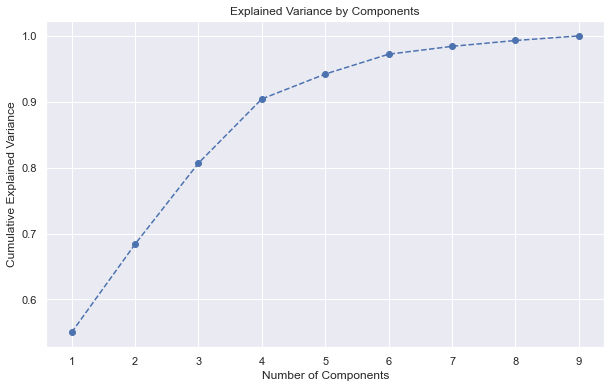

In [402]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [403]:
pca1 = PCA(n_components=3)
data_pca1 = pca1.fit_transform(df_scaled)

df_pca1 = pd.DataFrame(data_pca1)
df_pca1.head()

,0,1,2
0,-0.599078,0.095490,0.157554
1,0.158474,-0.212092,-0.064189
2,0.003686,-0.135867,-0.134182
3,-0.650235,0.275975,-0.142672
4,0.200711,-0.064662,-0.100715


In [404]:
def evaluate_cluster_models(data, min_clusters, max_clusters, step):
    results = []

    for k in range(min_clusters, max_clusters + 1, step):
        # Fit the model and obtain the labels
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        labels = kmeans.labels_

        # Evaluate the model
        silhouette = silhouette_score(data, labels)
        calinski_harabasz = calinski_harabasz_score(data, labels)
        davies_bouldin = davies_bouldin_score(data, labels)

        results.append({
            'n_clusters': k,
            'Silhouette Score': silhouette,
            'Calinski Harabasz Score': calinski_harabasz,
            'Davies Bouldin Score': davies_bouldin,
        })

    df_models = pd.DataFrame(results)
    return df_models

data = df_pca1
min_clusters = 3
max_clusters = 20
step = 2

result_df = evaluate_cluster_models(data, min_clusters, max_clusters, step)
print(result_df)

   n_clusters  Silhouette Score  Calinski Harabasz Score  Davies Bouldin Score
0           3          0.438632               169.246855              0.869531
1           5          0.376362               152.960276              0.870523
2           7          0.341547               151.012682              0.892017
3           9          0.321473               139.154180              0.969948
4          11          0.325439               135.433143              0.931115
5          13          0.318878               132.304886              0.907415
6          15          0.314177               127.821243              0.855651
7          17          0.330298               136.892879              0.754106
8          19          0.318666               136.994101              0.790429


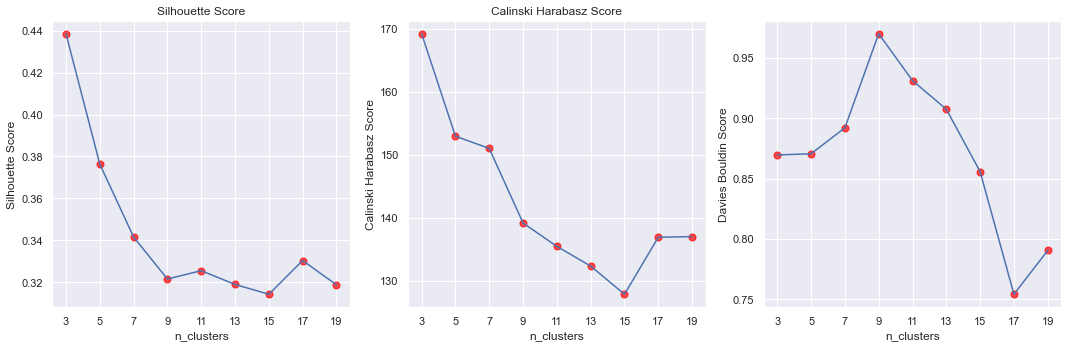

In [405]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.lineplot(x='n_clusters', y='Silhouette Score', data=result_df, ax=ax[0])
ax[0].scatter(result_df['n_clusters'], result_df['Silhouette Score'], color='red', s=50, marker='o', alpha=0.7)  
ax[0].set_title('Silhouette Score')
ax[0].set_xticks(np.arange(3, 21, 2))
ax[0].set_xticklabels(np.arange(3, 21, 2))

sns.lineplot(x='n_clusters', y='Calinski Harabasz Score', data=result_df, ax=ax[1])
ax[1].scatter(result_df['n_clusters'], result_df['Calinski Harabasz Score'], color='red', s=50, marker='o', alpha=0.7)  
ax[1].set_title('Calinski Harabasz Score')
ax[1].set_xticks(np.arange(3, 21, 2))
ax[1].set_xticklabels(np.arange(3, 21, 2))

sns.lineplot(x='n_clusters', y='Davies Bouldin Score', data=result_df, ax=ax[2])
ax[2].scatter(result_df['n_clusters'], result_df['Davies Bouldin Score'], color='red', s=50, marker='o', alpha=0.7)  
ax[2].set_xticks(np.arange(3, 21, 2))
ax[2].set_xticklabels(np.arange(3, 21, 2))

plt.tight_layout()
plt.show()

<h3>5. Final Model </h3>

In [406]:
kmeans = KMeans(n_clusters=3, random_state=80)
kmeans.fit(df_pca1)
labels = kmeans.labels_

In [407]:
df['cluster'] = labels
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1


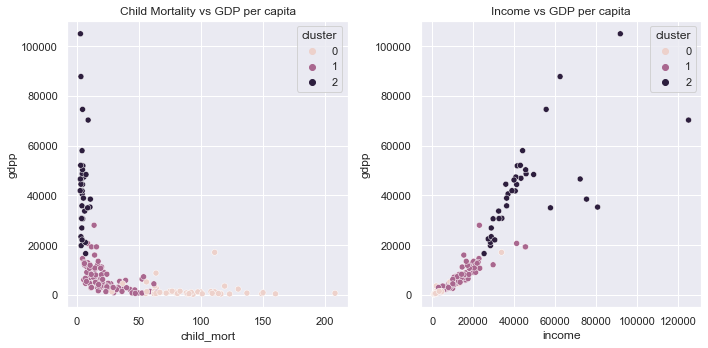

In [408]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.scatterplot(x='child_mort', y='gdpp', hue='cluster', data=df, ax=ax[0])
ax[0].set_title('Child Mortality vs GDP per capita')

sns.scatterplot(x='income', y='gdpp', hue='cluster', data=df, ax=ax[1])
ax[1].set_title('Income vs GDP per capita')

fig.tight_layout()
fig.show()

Based on the information depicted in the graph above, we can categorize the clusters as follows:

<ul>
    <li>Cluster 0: Underdeveloped countries</li>
    <li>Cluster 1: Developing countries</li>
    <li>Cluster 2: Developed countries</li>
</ul>

Now that we have this information, we can create a choropleth map to easily identify the countries in need of help.

In [409]:
df['cluster'].loc[df['cluster'] == 0] = 'Help Needed'
df['cluster'].loc[df['cluster'] == 1] = 'Might Help Needed'
df['cluster'].loc[df['cluster'] == 2] = 'No Help Needed'

fig = px.choropleth(df[['country','cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = df['cluster'],
                    color_discrete_sequence = ['red', 'yellow', 'green']
                    )

fig.show()